In [36]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Create a file path
filepath = "../Resources/data.csv"
# Read in the data.
df = pd.read_csv(filepath)
df.head()

,Card,Quantity,Pilot,Archetype,Event,Date Posted,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.93,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.21,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.76,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.05,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,2023-06-06,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,3.70,4.80,rare


In [4]:
#drop Date Posted column
df.drop(columns=["Date Posted"], inplace=True)

KeyError: "['Date Posted'] not found in axis"

In [5]:
df.head()

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price EUR,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.93,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.21,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.76,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.05,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,3.70,4.80,rare


In [6]:
#Drop Price EUR column
df.drop(columns=["Price EUR"], inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Card                  2306 non-null   object        
 1   Quantity              2306 non-null   int64         
 2   Pilot                 2306 non-null   object        
 3   Archetype             2306 non-null   object        
 4   Event                 2306 non-null   object        
 5   Main/Sideboard        2306 non-null   object        
 6   Mana Value            2306 non-null   float64       
 7   Mana Cost             2306 non-null   object        
 8   Colours               2306 non-null   object        
 9   Most Recent Printing  2306 non-null   object        
 10  Card Text             2096 non-null   object        
 11  Type Line             2306 non-null   object        
 12  Price USD             2231 non-null   float64       
 13  Rarity            

In [7]:
df.head()

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,NaN,[],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare


In [8]:
#separte artifacts from lands
df.loc[df["Type Line"].str.contains("Land"), "Colours"] = "['L']"

#remove null values from Lands
df.loc[df["Mana Cost"].isna(), "Mana Cost"] = "['L']"

df.head() #final clean version of the data set

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare


In [9]:
#This will drop null values from the Price USD column 
price_drop_df = df.dropna(subset=['Price USD'])

In [10]:
price_drop_df #the dataframe for the linregress

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.31,rare
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.16,rare
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.96,rare
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.15,uncommon
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,The Chain Veil,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,4.0,{4},[],2014-07-18,"At the beginning of your end step, if you didn...",Legendary Artifact,26.69,mythic
2302,Tormod's Crypt,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,0.0,['L'],[],2020-07-03,"{T}, Sacrifice Tormod's Crypt: Exile target pl...",Artifact,0.24,uncommon
2303,Voracious Hydra,2,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,2.0,{X}{G}{G},['G'],2019-07-12,Trample\nVoracious Hydra enters the battlefiel...,Creature — Hydra,4.21,rare
2304,Treasure Vault,1,Pilot 8,Mono-Green Devotion,MTG SEA Championship,Sideboard,0.0,['L'],['L'],2021-07-23,"{T}: Add {C}.\n{X}{X}, {T}, Sacrifice Treasure...",Artifact Land,4.78,rare


In [11]:
# count number of colors/color combinations and the number of each occurrance
colours = df['Colours'].value_counts()
print(colours)
print(type(colours))
# 23 variations as series. I don't see any null values or bad data.

Colours
['L']                   620
['B']                   273
[]                      272
['U']                   268
['W']                   266
['G']                   179
['R']                   171
['B', 'R']               76
['U', 'W']               61
['G', 'R']               29
['G', 'U']               24
['B', 'U']               14
['B', 'G']               10
['G', 'W']                8
['R', 'U']                7
['R', 'W']                5
['B', 'W']                5
['G', 'R', 'W']           4
['B', 'G', 'U']           4
['B', 'G', 'U', 'W']      4
['G', 'R', 'U', 'W']      3
['B', 'R', 'U']           1
['R', 'U', 'W']           1
['G', 'R', 'U']           1
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [12]:
# Update 'Colours' column based on the condition 'Type Line' contains 'Land'
# This will differentiate between Lands and Artifacts, which are both colorless
df.loc[df["Type Line"].str.contains("Land"), "Colours"] = "['L']"
print(colours)

Colours
['L']                   620
['B']                   273
[]                      272
['U']                   268
['W']                   266
['G']                   179
['R']                   171
['B', 'R']               76
['U', 'W']               61
['G', 'R']               29
['G', 'U']               24
['B', 'U']               14
['B', 'G']               10
['G', 'W']                8
['R', 'U']                7
['R', 'W']                5
['B', 'W']                5
['G', 'R', 'W']           4
['B', 'G', 'U']           4
['B', 'G', 'U', 'W']      4
['G', 'R', 'U', 'W']      3
['B', 'R', 'U']           1
['R', 'U', 'W']           1
['G', 'R', 'U']           1
Name: count, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Card                  2306 non-null   object 
 1   Quantity              2306 non-null   int64  
 2   Pilot                 2306 non-null   object 
 3   Archetype             2306 non-null   object 
 4   Event                 2306 non-null   object 
 5   Main/Sideboard        2306 non-null   object 
 6   Mana Value            2306 non-null   float64
 7   Mana Cost             2306 non-null   object 
 8   Colours               2306 non-null   object 
 9   Most Recent Printing  2306 non-null   object 
 10  Card Text             2096 non-null   object 
 11  Type Line             2306 non-null   object 
 12  Price USD             2231 non-null   float64
 13  Rarity                2306 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 252.3+ KB


In [16]:
price_drop_df["Printing Dates"]=pd.to_datetime(df["Most Recent Printing"])

C:\Users\Madden 9Round\AppData\Local\Temp\ipykernel_16944\3365663772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_drop_df["Printing Dates"]=pd.to_datetime(df["Most Recent Printing"])


In [18]:
price_drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2231 entries, 0 to 2305
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Card                  2231 non-null   object        
 1   Quantity              2231 non-null   int64         
 2   Pilot                 2231 non-null   object        
 3   Archetype             2231 non-null   object        
 4   Event                 2231 non-null   object        
 5   Main/Sideboard        2231 non-null   object        
 6   Mana Value            2231 non-null   float64       
 7   Mana Cost             2231 non-null   object        
 8   Colours               2231 non-null   object        
 9   Most Recent Printing  2231 non-null   object        
 10  Card Text             2023 non-null   object        
 11  Type Line             2231 non-null   object        
 12  Price USD             2231 non-null   float64       
 13  Rarity                2

In [19]:
today = pd.Timestamp("2024-06-03")

In [20]:
price_drop_df["Printing Age"] = (today-price_drop_df["Printing Dates"]).dt.days
price_drop_df.head()

C:\Users\Madden 9Round\AppData\Local\Temp\ipykernel_16944\14248698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_drop_df["Printing Age"] = (today-price_drop_df["Printing Dates"]).dt.days


,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity,Printing Dates,Printing Age
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.31,rare,2019-01-25,1956
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.16,rare,2023-04-21,409
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.96,rare,2020-04-17,1508
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.15,uncommon,2023-04-21,409
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0.0,['L'],['L'],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare,2020-07-03,1431


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306 entries, 0 to 2305
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Card                  2306 non-null   object        
 1   Quantity              2306 non-null   int64         
 2   Pilot                 2306 non-null   object        
 3   Archetype             2306 non-null   object        
 4   Event                 2306 non-null   object        
 5   Main/Sideboard        2306 non-null   object        
 6   Mana Value            2306 non-null   float64       
 7   Mana Cost             2306 non-null   object        
 8   Colours               2306 non-null   object        
 9   Most Recent Printing  2306 non-null   object        
 10  Card Text             2096 non-null   object        
 11  Type Line             2306 non-null   object        
 12  Price USD             2231 non-null   float64       
 13  Rarity            

In [21]:
price_drop_df['Mana Value'] = df['Mana Value'].astype(int)

C:\Users\Madden 9Round\AppData\Local\Temp\ipykernel_16944\3173034620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_drop_df['Mana Value'] = df['Mana Value'].astype(int)


In [32]:
price_drop_df.head()

,Card,Quantity,Pilot,Archetype,Event,Main/Sideboard,Mana Value,Mana Cost,Colours,Most Recent Printing,Card Text,Type Line,Price USD,Rarity,Printing Dates,Printing Age
0,Hallowed Fountain,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0,['L'],['L'],2019-01-25,({T}: Add {W} or {U}.)\nAs Hallowed Fountain e...,Land — Plains Island,11.31,rare,2019-01-25,1956
1,Prairie Stream,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0,['L'],['L'],2023-04-21,({T}: Add {W} or {U}.)\nPrairie Stream enters ...,Land — Plains Island,0.16,rare,2023-04-21,409
2,Irrigated Farmland,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0,['L'],['L'],2020-04-17,({T}: Add {W} or {U}.)\nIrrigated Farmland ent...,Land — Plains Island,0.96,rare,2020-04-17,1508
3,Field of Ruin,2,Pilot 1,Azorius Control,MTG China Open,Mainboard,0,['L'],['L'],2023-04-21,"{T}: Add {C}.\n{2}, {T}, Sacrifice Field of Ru...",Land,0.15,uncommon,2023-04-21,409
4,Fabled Passage,4,Pilot 1,Azorius Control,MTG China Open,Mainboard,0,['L'],['L'],2020-07-03,"{T}, Sacrifice Fabled Passage: Search your lib...",Land,4.80,rare,2020-07-03,1431


In [144]:
type_count = df['Type Line'].value_counts()
type_count

Type Line
Instant                                            356
Sorcery                                            259
Land                                               255
Legendary Land                                     128
Artifact                                            93
                                                  ... 
Land — Plains Swamp Forest                           1
Instant // Sorcery                                   1
Battle — Siege // Legendary Creature — Dinosaur      1
Basic Snow Land — Island                             1
Creature — Hydra                                     1
Name: count, Length: 181, dtype: int64

In [156]:
#Land count
keyword = 'Land'
count_with_land = df['Type Line'].str.contains(keyword).sum()
count_with_land

#Sorcery
#keyword = 'Sorcery'
#count_with_sorcery = df['Type Line'].str.contains(keyword).sum()
#count_with_sorcery

620

In [149]:
#Sorcery
keyword = 'Sorcery'
count_with_sorcery = df['Type Line'].str.contains(keyword).sum()
count_with_sorcery


286

In [152]:
keyword = 'Artifact'
count_with_artifact = df['Type Line'].str.contains(keyword).sum()
count_with_artifact


312

In [153]:
keyword = 'Creature'
count_with_creature = df['Type Line'].str.contains(keyword).sum()
count_with_creature

588

In [159]:
keyword = {'count_with_land', 'count_with_sorcery', 'count_with_artifact', 'count_with_creature'}
keyword_df = pd.DataFrame(keyword)
keyword_df

,0
0,count_with_creature
1,count_with_artifact
2,count_with_land
3,count_with_sorcery


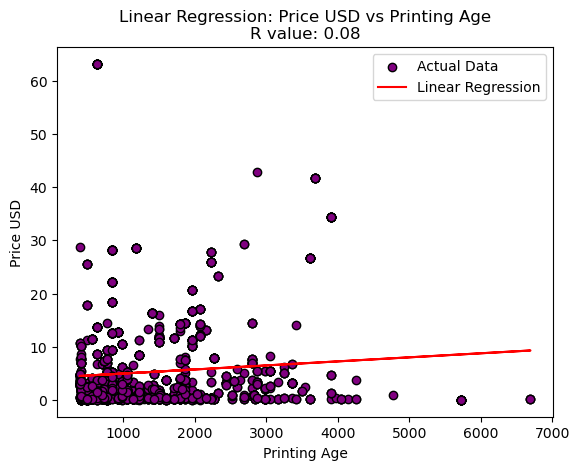

In [117]:
#Variables
X = price_drop_df[['Printing Age']]  # Features (age column)
y = price_drop_df['Price USD']  # Target variable (price column)

# Fit the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(X.values.flatten(), y.values)

# Create the linear regression line
predicted_prices = slope * X.values.flatten() + intercept

# Plot the original data and the linear regression line
plt.scatter(X, y, color='purple', label='Actual Data', edgecolors='black')
plt.plot(X, predicted_prices, color='red', label='Linear Regression')
plt.xlabel('Printing Age')
plt.ylabel('Price USD')
plt.title(f'Linear Regression: Price USD vs Printing Age\nR value: {r_value:.2f}')
plt.legend()
#plt.show()
plt.savefig('linear_regression_plot.svg', format='svg')

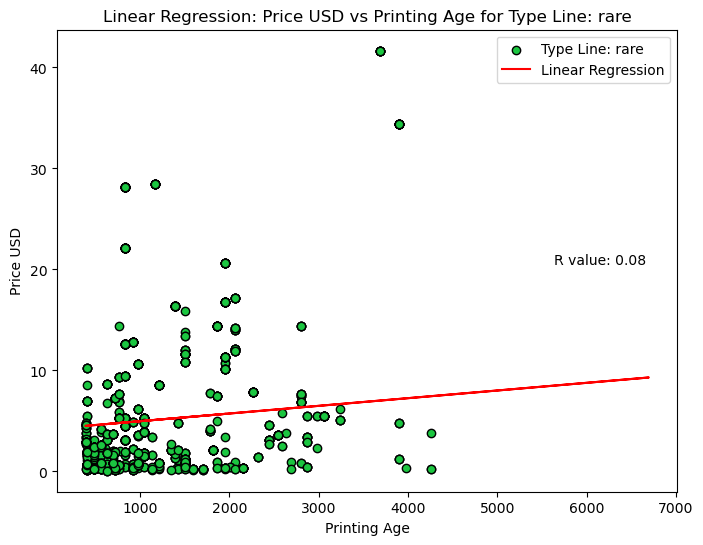

In [126]:
#Further linregress breakdown
X = price_drop_df[['Printing Age']]  # Features (age column)
y = price_drop_df['Price USD']  # Target variable (price column)

# Fit the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(X.values.flatten(), y.values)

# Create the linear regression line
predicted_prices = slope * X.values.flatten() + intercept

# Specify the value of 'Rarity'
specific_Rarity = 'rare'

# Filter the DataFrame for the specific Rarity
subset_df = price_drop_df[price_drop_df['Rarity'] == specific_Rarity]

# Plot the original data and the linear regression line for the specific Rarity
plt.figure(figsize=(8, 6))
plt.scatter(subset_df['Printing Age'], subset_df['Price USD'], marker='o', label='Type Line: ' + specific_Rarity, edgecolors='black')

plt.plot(X, predicted_prices, color='red', label='Linear Regression')
plt.xlabel('Printing Age')
plt.ylabel('Price USD')
plt.title('Linear Regression: Price USD vs Printing Age for Type Line: ' + specific_Rarity)
plt.legend()
plt.text(0.95, 0.5, f'R value: {r_value:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='center', horizontalalignment='right')
#plt.show()
plt.savefig('linear_regression_plot_sub1.svg', format='svg')

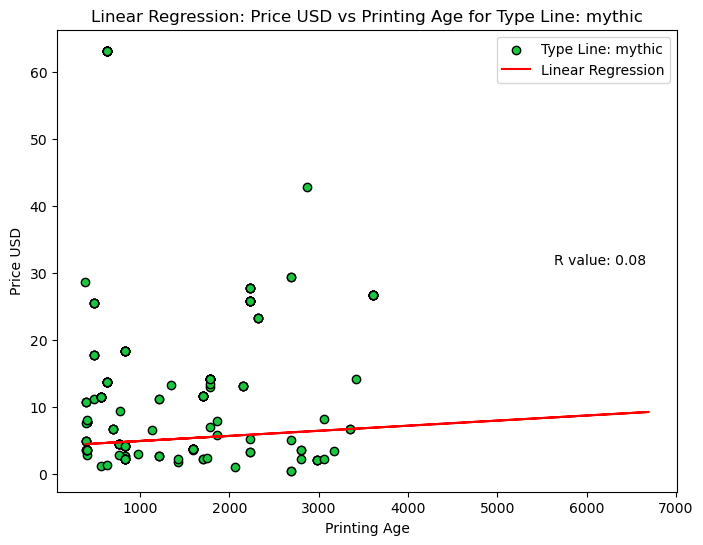

In [127]:
X = price_drop_df[['Printing Age']]  # Features (age column)
y = price_drop_df['Price USD']  # Target variable (price column)

# Fit the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(X.values.flatten(), y.values)

# Create the linear regression line
predicted_prices = slope * X.values.flatten() + intercept

# Specify the value of 'Rarity'
specific_Rarity = 'mythic'

# Filter the DataFrame for the specific Rarity
subset_df = price_drop_df[price_drop_df['Rarity'] == specific_Rarity]

# Plot the original data and the linear regression line for the specific Rarity
plt.figure(figsize=(8, 6))
plt.scatter(subset_df['Printing Age'], subset_df['Price USD'], marker='o', label='Type Line: ' + specific_Rarity, edgecolors='black')

plt.plot(X, predicted_prices, color='red', label='Linear Regression')
plt.xlabel('Printing Age')
plt.ylabel('Price USD')
plt.title('Linear Regression: Price USD vs Printing Age for Type Line: ' + specific_Rarity)
plt.legend()
plt.text(0.95, 0.5, f'R value: {r_value:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='center', horizontalalignment='right')
#plt.show()
plt.savefig('linear_regression_plot_sub2.svg', format='svg')

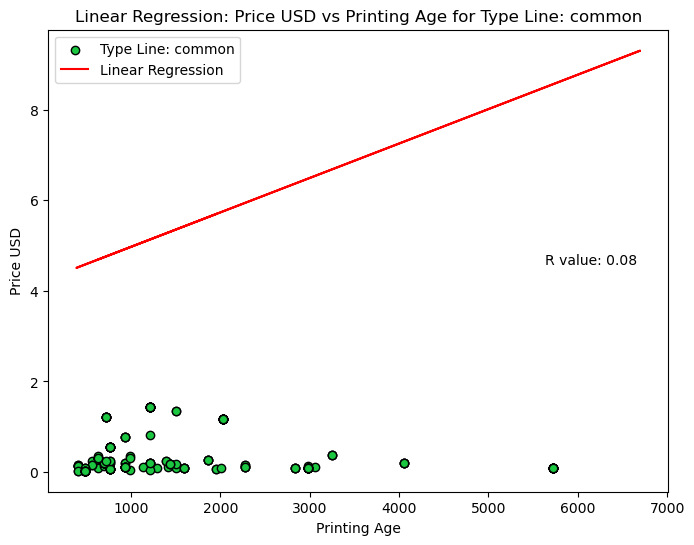

In [128]:
X = price_drop_df[['Printing Age']]  # Features (age column)
y = price_drop_df['Price USD']  # Target variable (price column)

# Fit the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(X.values.flatten(), y.values)

# Create the linear regression line
predicted_prices = slope * X.values.flatten() + intercept

# Specify the value of 'Rarity'
specific_Rarity = 'common'

# Filter the DataFrame for the specific Rarity
subset_df = price_drop_df[price_drop_df['Rarity'] == specific_Rarity]

# Plot the original data and the linear regression line for the specific Rarity
plt.figure(figsize=(8, 6))
plt.scatter(subset_df['Printing Age'], subset_df['Price USD'], marker='o', label='Type Line: ' + specific_Rarity, edgecolors='black')

plt.plot(X, predicted_prices, color='red', label='Linear Regression')
plt.xlabel('Printing Age')
plt.ylabel('Price USD')
plt.title('Linear Regression: Price USD vs Printing Age for Type Line: ' + specific_Rarity)
plt.legend()
plt.text(0.95, 0.5, f'R value: {r_value:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='center', horizontalalignment='right')
#plt.show()
plt.savefig('linear_regression_plot_sub3.svg', format='svg')

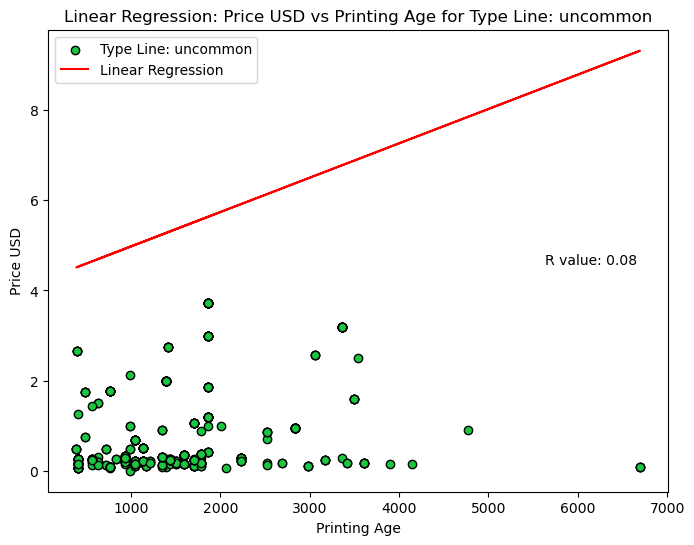

In [129]:
X = price_drop_df[['Printing Age']]  # Features (age column)
y = price_drop_df['Price USD']  # Target variable (price column)

# Fit the linear regression model
slope, intercept, r_value, p_value, std_err = stats.linregress(X.values.flatten(), y.values)

# Create the linear regression line
predicted_prices = slope * X.values.flatten() + intercept

# Specify the value of 'Rarity'
specific_Rarity = 'uncommon'

# Filter the DataFrame for the specific Rarity
subset_df = price_drop_df[price_drop_df['Rarity'] == specific_Rarity]

# Plot the original data and the linear regression line for the specific Rarity
plt.figure(figsize=(8, 6))
plt.scatter(subset_df['Printing Age'], subset_df['Price USD'], marker='o', label='Type Line: ' + specific_Rarity, edgecolors='black')
plt.plot(X, predicted_prices, color='red', label='Linear Regression')
plt.xlabel('Printing Age')
plt.ylabel('Price USD')
plt.title('Linear Regression: Price USD vs Printing Age for Type Line: ' + specific_Rarity)
plt.legend()
plt.text(0.95, 0.5, f'R value: {r_value:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='center', horizontalalignment='right')
#plt.show()
plt.savefig('linear_regression_plot_sub4.svg', format='svg')

In [96]:
custom_palette = [ "#1BC640", "#1C91C6", "#CB3D36", "#9432B0"] 

In [39]:
rarity_count = df['Rarity'].value_counts()
rarity_count

Rarity
rare        1290
uncommon     505
common       262
mythic       249
Name: count, dtype: int64

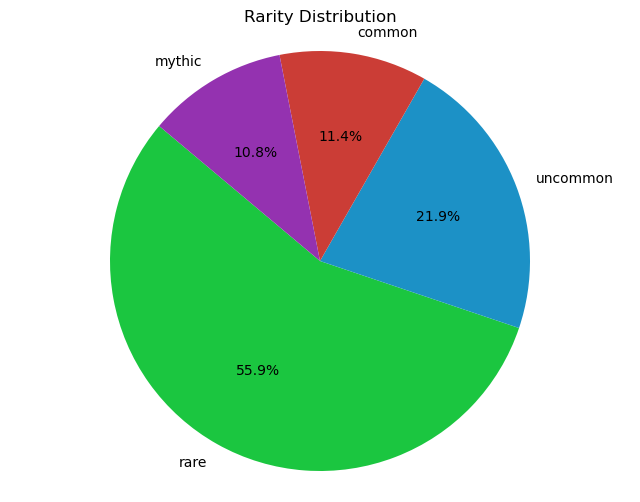

In [120]:
total_cards = len(df)

# Calculate rarity counts
rarity_count = df['Rarity'].value_counts()

# Calculate percentages
rarity_percentages = (rarity_count / total_cards) * 100

#custom colors
sns.set_palette(custom_palette)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(rarity_percentages, labels=rarity_percentages.index, autopct='%1.1f%%', startangle=140,)
plt.title('Rarity Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
#plt.show()
plt.savefig('pie_plot.svg', format='svg')

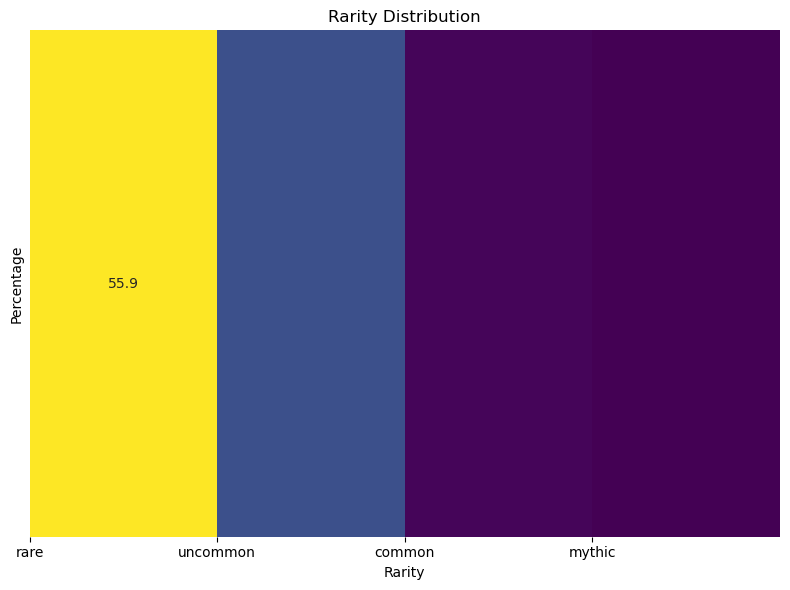

In [140]:
rarity_count = df['Rarity'].value_counts()

# Calculate percentages
rarity_percentages = (rarity_count / total_cards) * 100

# Create a matrix from the rarity percentages
rarity_matrix = rarity_percentages.values.reshape(1, -1)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(rarity_matrix, cmap='viridis', annot=True, fmt='.1f', cbar=False)
plt.title('Rarity Distribution')
plt.xlabel('Rarity')
plt.ylabel('Percentage')
plt.xticks(ticks=range(len(rarity_percentages)), labels=rarity_percentages.index)
plt.yticks([])  # Remove y-axis ticks
plt.tight_layout()

# Save the plot
plt.savefig('heatmap_rarity_distribution.svg', format='svg')
plt.show()

In [40]:
#rarity brea
rarity_breakdown = df.groupby('Rarity')['Card'].apply(list)
rarity_breakdown

Rarity
common      [Make Disappear, Island, Plains, Disdainful St...
mythic      [Teferi, Hero of Dominaria, The Wandering Empe...
rare        [Hallowed Fountain, Prairie Stream, Irrigated ...
uncommon    [Field of Ruin, Lay Down Arms, Rewind, Mystica...
Name: Card, dtype: object

In [33]:
#for comparing main board to sideboard
main_sideboard = df.groupby('Main/Sideboard')['Card'].apply(list)
main_sideboard

Main/Sideboard
Mainboard    [Hallowed Fountain, Prairie Stream, Irrigated ...
Sideboard    [Disdainful Stroke, Narset, Parter of Veils, T...
Name: Card, dtype: object

In [23]:
#average converted mana cost of cards in Archetype
average_archetype = df.groupby('Archetype')['Mana Value'].mean()
average_archetype

Archetype
Abzan Greasefang           1.797101
Atarka Red                 1.566667
Azorius Control            2.399351
Azorius Lotus Field        2.387097
Azorius Spirits            1.454545
Boros Convoke              1.603774
Dimir Rogues               1.609091
Enigmatic Fires            2.823529
Enigmatic-Fires            2.970588
Four-Color Elementals      2.333333
Gruul Vehicles             2.033333
Izzet Creativity           2.234375
Izzet Phoenix              2.172414
Jeskai Ascendancy Combo    1.645161
Lotus Field Combo          3.094203
Mono-Blue Spirits          1.720000
Mono-Green Devotion        2.845506
Mono-White Humans          1.957895
Neoform Atraxa             2.035714
Omnath to Light            2.061728
Rakdos Midrange            1.586319
Rakdos Sacrifice           1.339207
Rona Combo                 1.597015
Name: Mana Value, dtype: float64

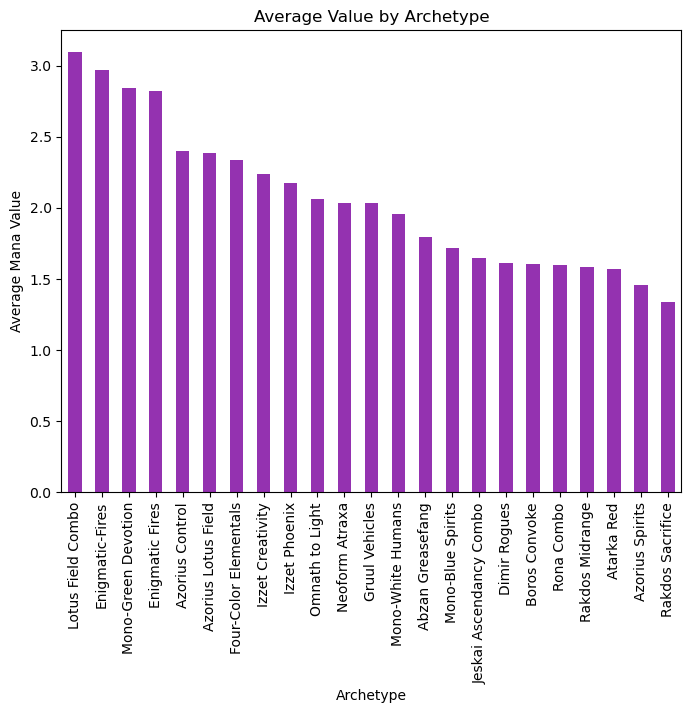

In [119]:
average_archetype = average_archetype.sort_values(ascending=False)

archetype_color = ["#9432B0"]
sns.set_palette(archetype_color)

average_archetype.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Archetype')
plt.ylabel('Average Mana Value')
plt.title('Average Value by Archetype')
#plt.show()
plt.savefig('bar_plot.svg', format='svg')

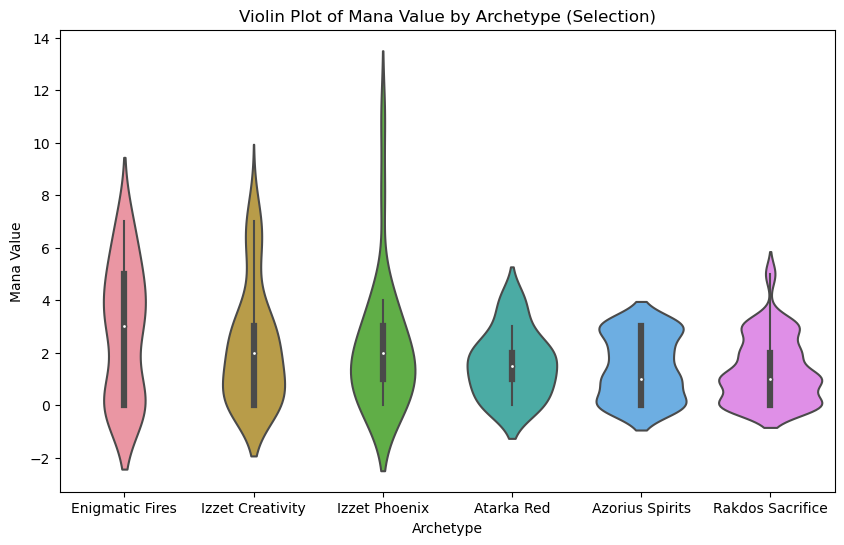

In [133]:
selected_archetypes = ['Enigmatic Fires', 'Izzet Creativity', 'Izzet Phoenix', 'Atarka Red', 'Azorius Spirits', 'Rakdos Sacrifice']
filtered_df = df[df['Archetype'].isin(selected_archetypes)]

plt.figure(figsize=(10, 6))
sns.violinplot(x='Archetype', y='Mana Value', data=df, order=filtered_df.groupby('Archetype')['Mana Value'].mean().sort_values(ascending=False).index)
plt.xlabel('Archetype')
plt.ylabel('Mana Value')
plt.title('Violin Plot of Mana Value by Archetype (Selection)')
#plt.show()
plt.savefig('violin_plot.svg', format='svg')

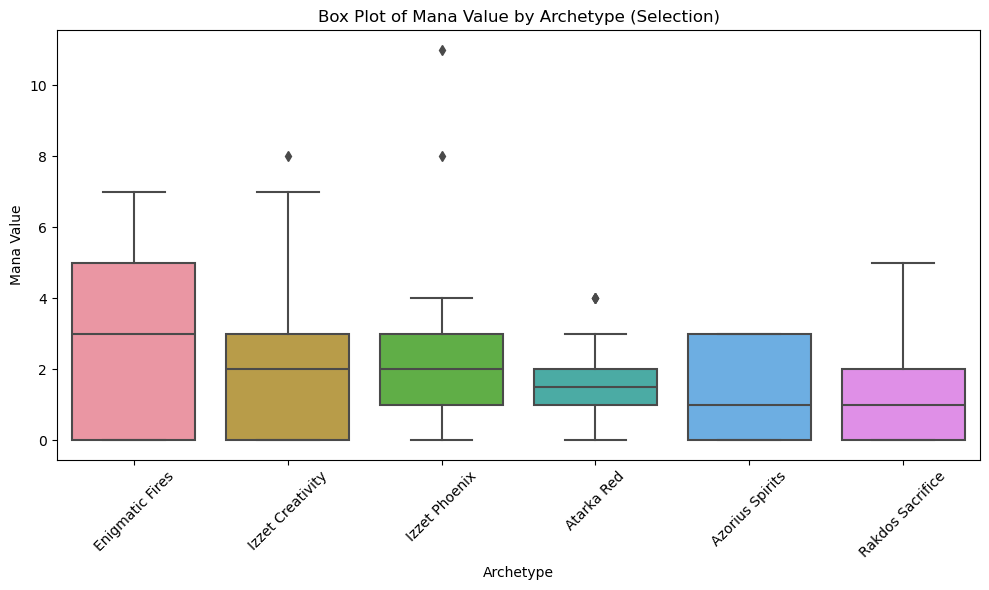

In [142]:
selected_archetypes = ['Enigmatic Fires', 'Izzet Creativity', 'Izzet Phoenix', 'Atarka Red', 'Azorius Spirits', 'Rakdos Sacrifice']

# Filter the DataFrame for the selected archetypes
filtered_df = df[df['Archetype'].isin(selected_archetypes)]

plt.figure(figsize=(10, 6))

# Create a box plot using Seaborn
sns.boxplot(x='Archetype', y='Mana Value', data=filtered_df, order=selected_archetypes)
plt.xlabel('Archetype')
plt.ylabel('Mana Value')
plt.title('Box Plot of Mana Value by Archetype (Selection)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Save the plot
plt.savefig('box_plot_selected_archetypes.svg', format='svg')
#plt.show()


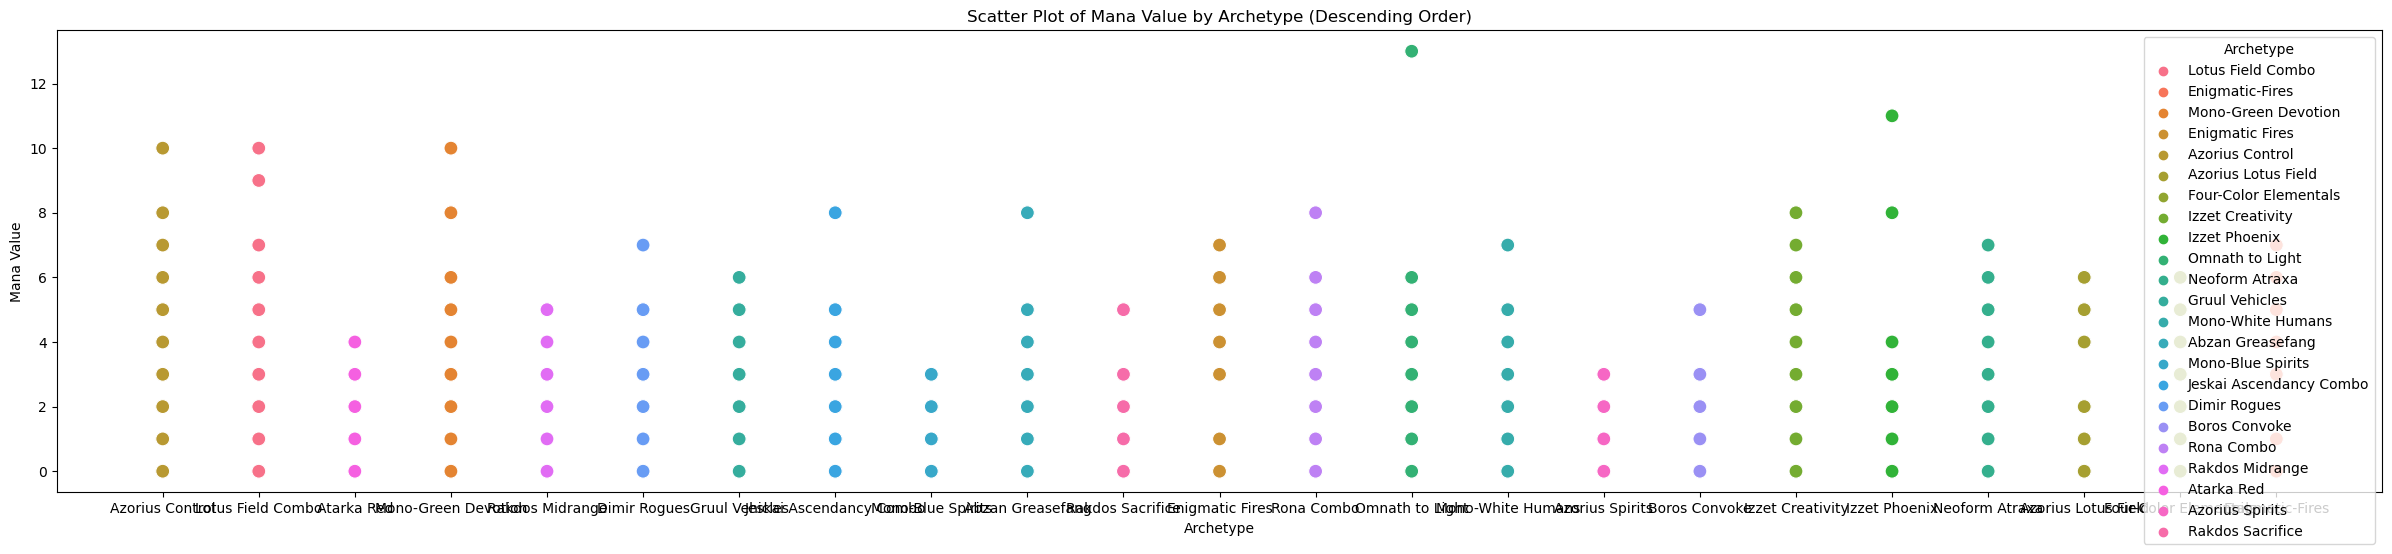

In [26]:
plt.figure(figsize=(30, 6))
sns.scatterplot(data=df, x='Archetype', y='Mana Value', hue='Archetype', hue_order=average_archetype.index, s=100)
plt.xlabel('Archetype')
plt.ylabel('Mana Value')
plt.title('Scatter Plot of Mana Value by Archetype (Descending Order)')
plt.show()

C:\Users\Madden 9Round\AppData\Local\Temp\ipykernel_16944\3529639549.py:2: UserWarning: 
The sizes list has fewer values (3) than needed (23) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(data=df, x='Archetype', y='Mana Value', size='Archetype', sizes=[200, 200, 200], hue_order=average_archetype.index)


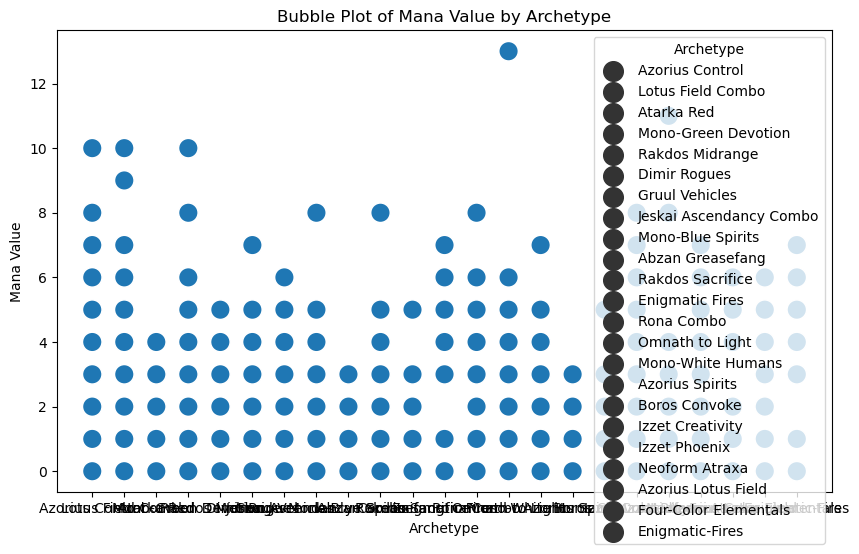

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Archetype', y='Mana Value', size='Archetype', sizes=[200, 200, 200], hue_order=average_archetype.index)
plt.xlabel('Archetype')
plt.ylabel('Mana Value')
plt.title('Bubble Plot of Mana Value by Archetype')
plt.show()

C:\Users\Public\anaconda\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Public\anaconda\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


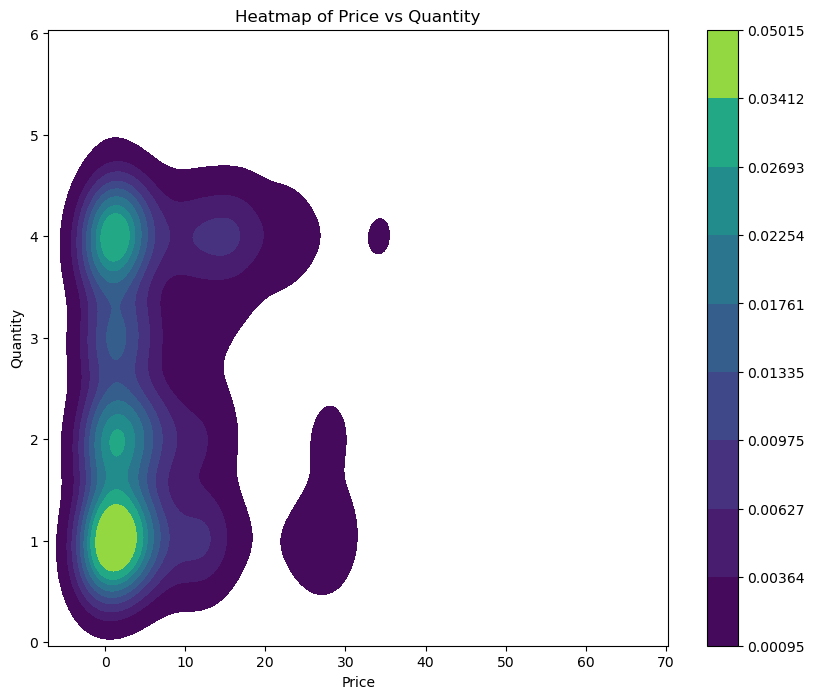

In [138]:
price_data = df['Price USD']
quantity_data = df['Quantity']

# Create a heatmap using Seaborn's kdeplot
plt.figure(figsize=(10, 8))
sns.kdeplot(x=price_data, y=quantity_data, cmap='viridis', cbar=True, fill=True)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Heatmap of Price vs Quantity')
plt.show()

In [28]:
df.corr(numeric_only=True)

,Quantity,Mana Value,Price USD
Quantity,1.000000,-0.114507,0.093790
Mana Value,-0.114507,1.000000,0.026154
Price USD,0.093790,0.026154,1.000000


In [ ]:
#sub dataframe from type

In [ ]:
#chnage over time